In [60]:
from keras.datasets import imdb

# train_data and test_data each contain 25000 movie reviews (sequences of integers)
# each integer in the sequence represents a specific word in a dictionary
# num_words = 10000 only pulls out the top 10000 most-used words from the movie reviews
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

import numpy as np

# turns data into neural network-ready tensor
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) # 25000 x 10000 2D tensor
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        
    return results

# turns train_data and test_data into neural network-ready tensors
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# turns train_labels and test_labels into numpy type array
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

# creates neural network
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, ))) # relu(dot(W, input) + b)
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) # sigmoid function

# set aside some sequences and their labels to monitor loss and accuracy during the training process
x_val = x_train[:10000]
y_val = y_train[:10000]

# make the training data exclude the data used to monitor loss and accuracy previously
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

# define optimizer, loss function, and metrics to optimize
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

# training begins
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 4,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

# tests the trained neural network with the test data
results = model.evaluate(x_test, y_test)
print(results)

# calculates and shows the predicted values
model.predict(x_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 188us/step - loss: 0.4248 - acc: 0.8075 - val_loss: 0.3263 - val_acc: 0.8661
Epoch 2/10
25000/25000 [==============================] - 4s 147us/step - loss: 0.2421 - acc: 0.9077 - val_loss: 0.3313 - val_acc: 0.8641
Epoch 3/10
25000/25000 [==============================] - 4s 153us/step - loss: 0.1844 - acc: 0.9314 - val_loss: 0.3075 - val_acc: 0.8756
Epoch 4/10
25000/25000 [==============================] - 4s 171us/step - loss: 0.1472 - acc: 0.9450 - val_loss: 0.3227 - val_acc: 0.8773
Epoch 5/10
25000/25000 [==============================] - 4s 150us/step - loss: 0.1155 - acc: 0.9578 - val_loss: 0.3957 - val_acc: 0.8637
Epoch 6/10
25000/25000 [==============================] - 4s 154us/step - loss: 0.0919 - acc: 0.9670 - val_loss: 0.3986 - val_acc: 0.8716
Epoch 7/10
25000/25000 [==============================] - 4s 154us/step - loss: 0.0675 - acc: 0.9767 - val_loss: 0.4446 - 

array([[0.02124002],
       [0.9999999 ],
       [0.99961215],
       ...,
       [0.11564999],
       [0.00405452],
       [0.9482801 ]], dtype=float32)

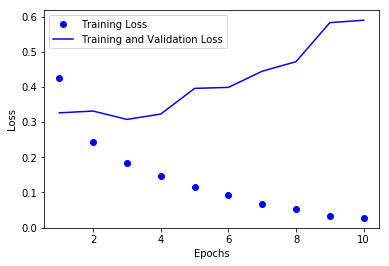

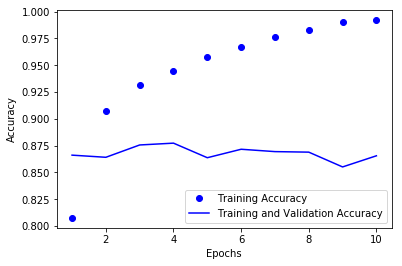

In [61]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
history_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs, history_acc_values, 'b', label = 'Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()